<a href="https://colab.research.google.com/github/pksnj/timeseriesAP/blob/main/AirPass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Analysis on Air Passangers data**


In [2]:
##Set up the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#rcParams[plt.figure.figsize] = 10, 6
#import seaborn as sns  # pip install seaborn
#!pip install pmdarima
import warnings
warnings.filterwarnings("ignore")

**Get Data**

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#/content/drive/MyDrive/AirPassengers.csv
#ap=pd.read_csv("/content/drive/MyDrive/AirPassengers.csv", index_col='Month', parse_dates=True)

In [4]:
#ap = pd.read_csv(r"C:\apk\Education\Meetups-TRU\TimeSeries\AirPassengers.csv")
#ap = pd.read_csv("/content/AirPassengers.csv")
#ap = pd.read_csv("AirPassengers.csv")
ap = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=True)

**Exploratory Analysis**

In [5]:
#print(ap.head(15))
ap.shape
#ap.columns

(144, 1)

In [6]:
#check the datatypes, spcially the date field
ap.dtypes

#Passengers    int64
dtype: object

In [7]:
#check for null values
ap.isnull().sum()
#ap=ap.dropna()

#Passengers    0
dtype: int64

In [8]:
ap.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [9]:
#Format Month is astring. Format it to datetime
#from datetime import datetime
#ap['Month'] = pd.to_datetime(ap['Month'], infer_datetime_format=True)
#ixap = ap.set_index(['Month'])

ixap = ap
ixap.tail(15)


,#Passengers
Month,
1959-10-01,407
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535


In [10]:
#check unique values
print(ap['#Passengers'].unique())

[112 118 132 129 121 135 148 136 119 104 115 126 141 125 149 170 158 133
 114 140 145 150 178 163 172 199 184 162 146 166 171 180 193 181 183 218
 230 242 209 191 194 196 236 235 229 243 264 272 237 211 201 204 188 227
 234 302 293 259 203 233 267 269 270 315 364 347 312 274 278 284 277 317
 313 318 374 413 405 355 306 271 301 356 348 422 465 467 404 305 336 340
 362 363 435 491 505 359 310 337 360 342 406 396 420 472 548 559 463 407
 417 391 419 461 535 622 606 508 390 432]


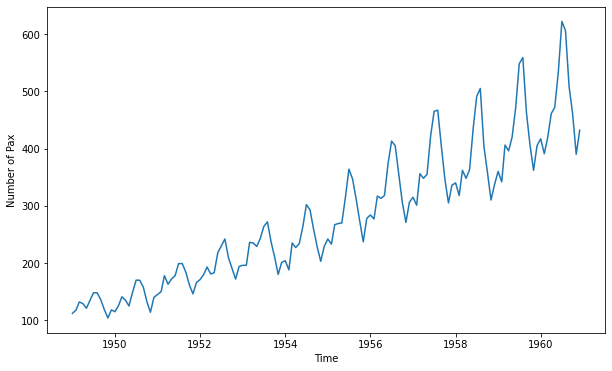

In [11]:
## plot
plt.xlabel("Time")
plt.ylabel("Number of Pax")
plt.plot(ixap)

**Stationarity**
1.   Visual: plot rolling mean and std deviation
2.   Augmented Dicky Fuller (ADCF) Test


In [12]:
#rolling stats to confirm the stationarity
rmean = ixap.rolling(window=12).mean()   ## Note: Rolling mean is same as Moving Average
rstd = ixap.rolling(window=12).std()
print(rmean, rstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


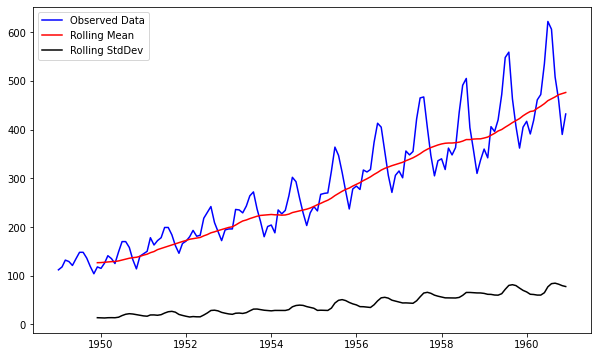

In [13]:
#Plot mean and std deviation to visually confirm the stationarity
obs = plt.plot(ixap, color = 'blue', label = 'Observed Data')
rmn = plt.plot(rmean, color = 'red', label = 'Rolling Mean')
rsd = plt.plot(rstd, color = 'black', label = 'Rolling StdDev')
plt.legend(loc='best')
plt.show(block=False)

In [14]:
#Adv Dickey-Fuller test. Statistical method to confirm sationarity
#Ho: Data is not stationary  -- Null Hypothesis
#Ha: Data is stationary      -- Alternate Hypostheses
#If p-value < 0.05, then reject the null hypothesis
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ixap['#Passengers'], autolag='AIC') #AIC is A??? Information Crietria
dfout = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No of Observations used'])
#for key,value in dftest[4].items():
#  dfout['Critical value (%s)'%key] = value

print(dfout)

Test Statistic               0.815369
p-value                      0.991880
#Lags Used                  13.000000
No of Observations used    130.000000
dtype: float64


In [29]:
#Better way to run ADCF is to create a function.
#Ho: Data is non-stationary  -- Null Hypothesis
#Ha: Data is stationary      -- Alternate Hypothesis
#If p-value < 0.05, then reject the null hypothesis

from statsmodels.tsa.stattools import adfuller
def adfuller_test(tsdat):
  dftest = adfuller(tsdat, autolag='AIC') #AIC is A??? Information Crietria
  dfout = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'No of Observations used'])
  for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
  print(dfout)

  print("Note that the p-value is:", dftest[1])
  if dftest[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), hence we reject the null hypothesis. Alternate hypothesis must be true ie the Data is Stationary")
  else:
    print("Weak evidence against null hypothesis, indicating that the data is non-stationary")



In [30]:
#Adv Dickey-Fuller test. 
print('Result of ADF test:')
adfuller_test(ixap['#Passengers'])


Result of ADF test:
Test Statistic               0.815369
p-value                      0.991880
#Lags Used                  13.000000
No of Observations used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64
Note that the p-value is: 0.991880243437641
Weak evidence against null hypothesis, indicating that the data is non-stationary


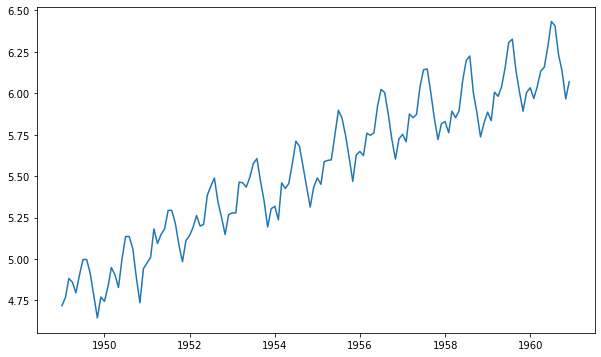

In [17]:
#trend. Try log to see if the data becomes stationary
ixap_log = np.log(ixap)
plt.plot(ixap_log)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     6.124517
1960-09-01     6.132246
1960-10-01     6.142628
1960-11-01     6.148837
1960-12-01     6.154215

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     0.171453
1960-09-01     0.174172
1960-10-01     0.169804
1960-11-01     0.160923
1960-12-01     0.156660

[144 rows x 1 columns]


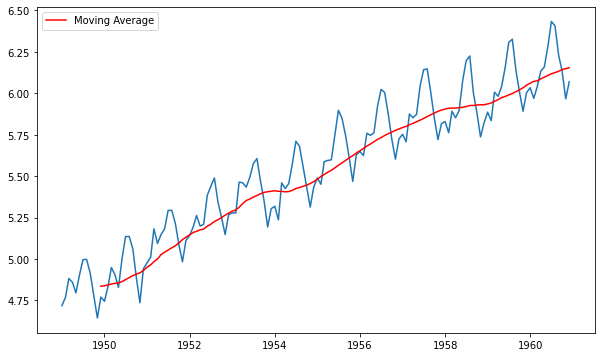

In [18]:
#Calculate/plot moving averages 
mavg = ixap_log.rolling(window=12).mean()   ## rolling mean is same as moving averages
mstd = ixap_log.rolling(window=12).std()
print(mavg, mstd)
plt.plot(ixap_log)
plt.plot(mavg, color = 'red', label = 'Moving Average')
#plt.plot(mstd, color = 'black', label = 'Moving StdDev')
plt.legend(loc='best')


In [31]:
#Augmented Dickey-Fuller test. 
print('Results of ADF test:')
adfuller_test(ixap_log['#Passengers'])


Results of ADF test:
Test Statistic              -1.717017
p-value                      0.422367
#Lags Used                  13.000000
No of Observations used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64
Note that the p-value is: 0.4223667747703914
Weak evidence against null hypothesis, indicating that the data is non-stationary


**Differencing**

Indexed on log scale - Moving Average

In [ ]:
#Try 2: Differences between MA and actual #ofpassangers
ixap_log_diffma = ixap_log - mavg
#ixap_log_diffma.head(15)
ixap_log_diffma.dropna(inplace=True)
ixap_log_diffma.head(15)

In [43]:
#Adv Dickey-Fuller test. 
print('Result of ADF test:')
adfuller_test(ixap_log_diffma['#Passengers'])

Result of ADF test:
Test Statistic              -3.162908
p-value                      0.022235
#Lags Used                  13.000000
No of Observations used    119.000000
Critical value (1%)         -3.486535
Critical value (5%)         -2.886151
Critical value (10%)        -2.579896
dtype: float64
Note that the p-value is: 0.02223463000124189
Strong evidence against the null hypothesis(Ho), hence we reject the null hypothesis. Alternate hypothesis must be true ie the Data is Stationary


In [ ]:
#Decompose so that we can separate seasonality out and apply timeseries to the trend
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(ixap_log, model='additive')
decom.plot()
plt.show

#trend = decom.trend  #long term trend in the data
#seasonality = decom.seasonal
#residual = decom.resid # not 
#plt.plot(trend, label='Trend')
#plt.plot(seasonality, label='Seasonality', color = 'red')
#plt.plot(residual, label='Residual', color = 'black')


**Identifying p, d , q**
*   PACF:
Identification of an AR model is often best done with the PACF
*   ACF:
For an MA model, the theoretical PACF tapers toward 0 in some manner.

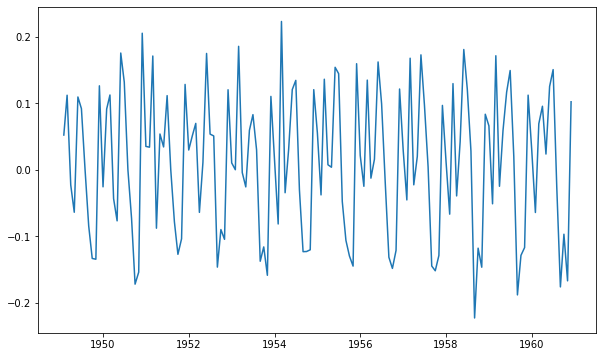

In [42]:
ixap_log_shift=(ixap_log - ixap_log.shift()).dropna()
plt.plot(ixap_log_shift)
#ixap_log_shift
#We have done differencing once, so d=1

In [ ]:
#PACF (partial auto corelation for p) and ACF (auto correlation for q)
from statsmodels.tsa.stattools import pacf, acf

 #PACF for value of p (AR)
lag_pacf = pacf(ixap_log_diffma, nlags=20, method='ols')  #ordinary least square
plt.subplot(121)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation Function (p)')
plt.axhline(y=0, color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ixap_log_diffma)), color='red')
plt.axhline(y=1.96/np.sqrt(len(ixap_log_diffma)), color='red')
plt.tight_layout

 #ACF for value of q (MA)
lag_acf = acf(ixap_log_diffma, nlags=20)
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Autocorrelation Function (q)')
plt.axhline(y=0, color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ixap_log_diffma)), color='red')
plt.axhline(y=1.96/np.sqrt(len(ixap_log_diffma)), color='red')
plt.tight_layout

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#AR: Auto Regression Model
modAR = ARIMA(ixap_log, order=(2,1,0))
results_AR = modAR.fit(disp=1)
plt.plot(results_AR.fittedvalues, color='red')



In [ ]:
#Moving average model
modMA = ARIMA(ixap_log, order=(0,1,2)) 
results_MA = modMA.fit(disp=1)
plt.plot(results_MA.fittedvalues, color='red')

**ARIMA Model**


In [ ]:
#ARIMA model
modARIMA = ARIMA(ixap_log, order=(2,1,2)) 
results_ARIMA = modARIMA.fit(disp=1)
plt.plot(results_ARIMA.fittedvalues, color='red')

#RSS=sum(((results_ARIMA.fittedvalues - ixap_log['#Passengers'])**2).dropna())
#print("Residual Sum of Squares: ", RSS)
#plt.title('RSS(Residual Sum of Squares: 'RSS)
#plt.title('RSS(Residual Sum of Squares): %.4f'% sum(((results_ARIMA.fittedvalues - ixap_log_diff['#Passengers'])**2).dropna())

**Forecast using ARIMA**

In [ ]:
prdARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(prdARIMA.head(15))

In [ ]:
#Convert to cumulative sum
prdARIMA_cumsum = prdARIMA.cumsum()
print(prdARIMA_cumsum)

In [ ]:
prdARIMA_log=pd.Series(ixap_log['#Passengers'], index=ixap_log.index)
prdARIMA_log=prdARIMA_log.add(prdARIMA_cumsum, fill_value=0)
prdARIMA_log.head()

In [54]:
#Testing: Compare the predicted values to actual values
#prdARIMA=np.exp(prdARIMA_log)   # predictions on original scale. Hint: exp is reverse of log
#plt.plot(ixap, color='blue')
#plt.plot(prdARIMA, color='red')

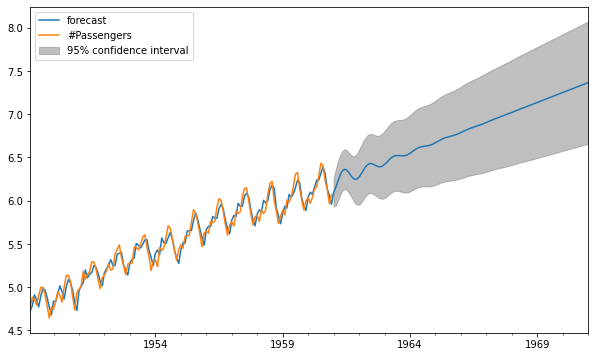

In [55]:
#forecasting
results_ARIMA.plot_predict(1,264)   ## 264 = 144 (orig rows) + 120 (10 years forecast)
plt.legend(loc='upper left')
#results_ARIMA.forecast(steps=120) ##120=12 (months/year) * 10 (years forecast)


In [108]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Other Ways to find order of AR, Integration(Differenciation) and MA ie p, d, q**

In [111]:
#Use pmdarima package to estimate p, d & q values
#!pipenv install --skip -lock pmdarima
#!pip install pmdarima
warnings.filterwarnings("ignore")

#import pmdarima
#from pmdarima.arima.utils import ndiffs
#ndiffs(ixap_log['#Passengers'], test="adf")

from pmdarima.arima import auto_arima
#step_wise_fit = auto_arima(ixap['#Passengers'], trace=True, suppress_warnings=True)
#step_wise_fit.summary()

ImportError: ignored

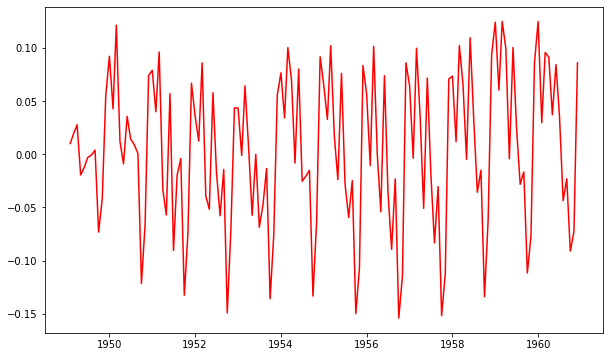

In [93]:
#ARIMA model again with p=4, d=1, q=3
from statsmodels.tsa.arima_model import ARIMA
modARIMA = ARIMA(ixap_log, order=(4,1,3)) 
results_ARIMA = modARIMA.fit(disp=1)
plt.plot(results_ARIMA.fittedvalues, color='red')

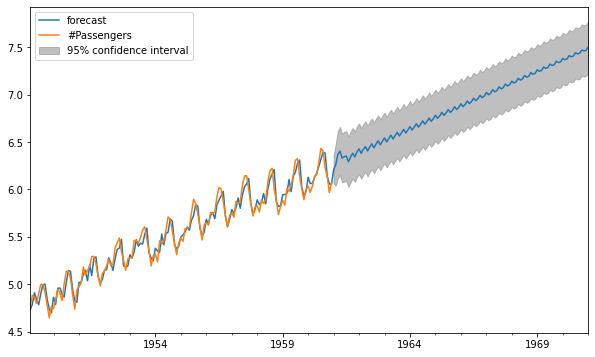

In [94]:
prdARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
prdARIMA_cumsum = prdARIMA.cumsum()
prdARIMA_log=pd.Series(ixap_log['#Passengers'], index=ixap_log.index)
prdARIMA_log=prdARIMA_log.add(prdARIMA_cumsum, fill_value=0)
prdARIMA=np.exp(prdARIMA_log)   # predictions on original scale
#plt.plot(ixap, color='blue')
#plt.plot(prdARIMA, color='red')
#forecasting
results_ARIMA.plot_predict(1,264)   ## 264 = 144 (orig rows) + 120 (10 years forecast)
plt.legend(loc='upper left')

**Customised method for finding p,d,q**

brute force

In [63]:
#Find p,d,q, using customised method and testing for a set of parameters
#https://www.youtube.com/watch?v=_qv_7lEuiZg
import itertools

In [98]:
train = ixap[:120]
test = ixap[120:]
train.tail(15)

,#Passengers
Month,
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435


In [95]:
p=range(0,3)
q=range(0,3)
d=range(0,2)
pdq_combinations = list(itertools.product(p,d,q))  # cartisian product
len(pdq_combinations)

pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]

In [104]:
combpdq=[]
rmse=[]
for pdq in pdq_combinations:
  try:
    model=ARIMA(train,order=pdq).fit()
    pred=model.predict(start=len(train), end=(len(test)-1))
    error=np.sqrt(mean_squared_error(test, pred)) 
    print(pdq, error)
    #combpdq.append(pdq)
    #rmse.append(error)

  except:
    continue


In [105]:
results=pd.DataFrame(index=combpdq, data=rmse, columns=['RMSE'])
results.to_csv('outpdq.csv')
results

,RMSE


#Additional approache for time series forecasting
Single Exponential Smoothing

Double Exponential Smoothing(a, b)

Triple Exponential Smoothing a.k.a Holt-Winters(a, b, g)

In [76]:
#environement

import itertools
import warnings
#import statsmodels.api as sm
#import statsmodels.tsa.api as smt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')


In [77]:
# Time Series Components 
def decomposefn (y, model="additive", stationary=False):
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

    

In [78]:
train = ixap[:120]
test = ixap[120:]
train.tail(15)


,#Passengers
Month,
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363
1958-06-01,435


In [79]:
test.head(15)

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420
1959-06-01,472
1959-07-01,548
1959-08-01,559
1959-09-01,463


In [ ]:
# Analysis for additive and multiplicative models
for model in ["additive", "multiplicative"]:
    decomposefn(ixap, model)